In [19]:
import clean_data
import feature_selection as fs
import modeling_2 as model
from sklearn.metrics import mean_squared_error
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
df = clean_data.runAll()

/Users/williamegan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [21]:
target = 'MD_EARN_WNE_P6'
df_no_id = df.drop('UNITID', axis=1)

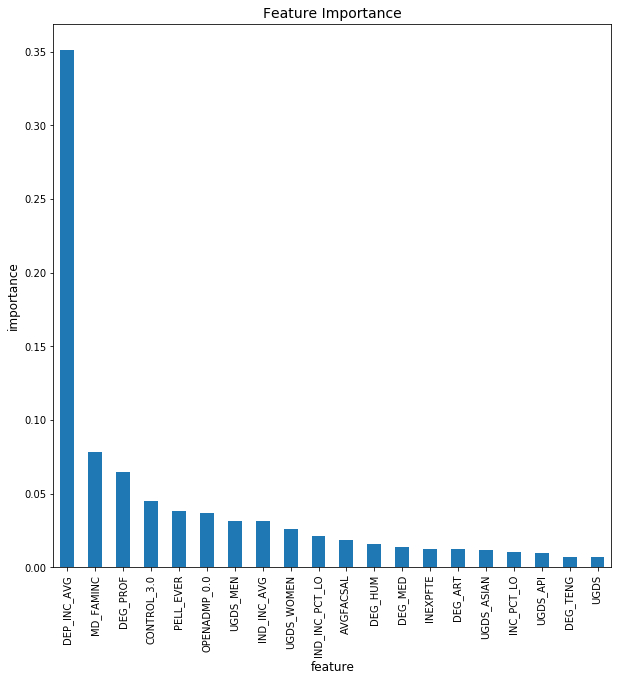

In [22]:
train, test = model.sampling_data(df_no_id)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

est = 20
sel = model.RF

naive_rf_feature_importance, naive_rf, naive_rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

imp_features = model.graph_feature_importance(naive_rf_feature_importance, x_train)

In [23]:
naive_feats = ['DEP_INC_AVG',
 'DEG_PROF',
 'MD_FAMINC',
 'CONTROL_3.0',
 'PELL_EVER',
 'OPENADMP_0.0',
 'IND_INC_AVG',
 'UGDS_MEN',
 'UGDS_WOMEN',
 'IND_INC_PCT_LO',
 'AVGFACSAL',
 'DEG_HUM',
 'INEXPFTE',
 'INC_PCT_LO',
 'DEG_ART',
 'UGDS_ASIAN',
 'DEG_MED',
 'UGDS_API',
 'UGDS',
 'DEG_TENG',
 'Year',
 'MD_EARN_WNE_P6']
n_df = df_no_id[naive_feats]

In [24]:
train, test = model.sampling_data(n_df)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

est = 20
sel = model.RF

naive_rf_feature_importance, naive_rf, naive_rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

In [25]:
mean_squared_error(y_test, naive_rf_preds)

0.002025669751937552

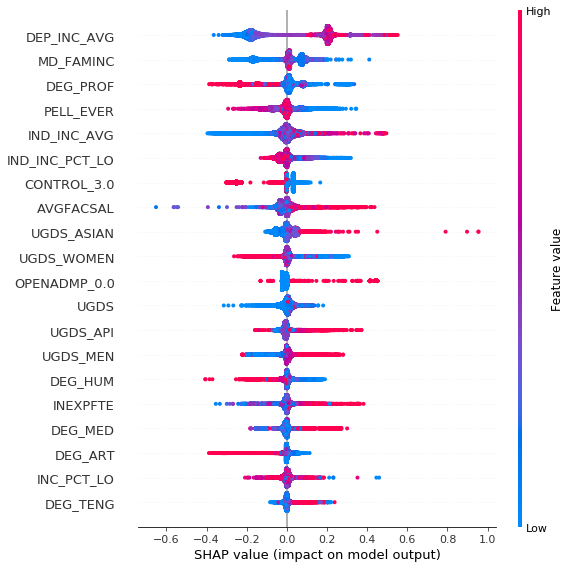

In [17]:
model.shap_summary_plot_for_Trees(naive_rf, x_train)